ConvNet classifier
=================

The second exercise is to build a Convolutional Neural Network to distuingish dogs from cats.

**Important: before you start, click "Runtime" in the top menu, then "Change runtime type", and pick Hardware accelerator GPU". This should speed things up.**

In [0]:
from pathlib import Path
import os
import zipfile

import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

The following command will download the dataset:

In [0]:
TMP_DIR = Path("/tmp")
ZIPFILE = TMP_DIR / "cats_and_dogs_filtered.zip"
BASE_DIR = TMP_DIR / "cats_and_dogs_filtered"

In [0]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O $ZIPFILE

--2019-03-20 20:30:54--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  83.8MB/s    in 0.8s    

2019-03-20 20:30:55 (83.8 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
zipf = zipfile.ZipFile(ZIPFILE, "r")
zipf.extractall(TMP_DIR)
zipf.close()

Let's see what we just downloaded! We will use the linux command `ls`. The exclamation mark tells the notebook that we're executing a command-line instruction istead of a Python instruction:

In [0]:
!ls $BASE_DIR

train  validation  vectorize.py


In [0]:
!ls $BASE_DIR/train

cats  dogs


In [0]:
!ls $BASE_DIR/train/dogs|head -n 5

dog.0.jpg
dog.100.jpg
dog.101.jpg
dog.102.jpg
dog.103.jpg


In [0]:
!ls $BASE_DIR/train/cats|head -n 5

cat.0.jpg
cat.100.jpg
cat.101.jpg
cat.102.jpg
cat.103.jpg


Let's create some convenient variables to access these directories:

In [0]:
TRAIN_DIR = BASE_DIR / "train"
VAL_DIR = BASE_DIR / "validation"

TRAIN_DOG_DIR = TRAIN_DIR / "dogs"
TRAIN_CAT_DIR = TRAIN_DIR / "cats"

VAL_DOG_DIR = VAL_DIR / "dogs"
VAL_CAT_DIR = VAL_DIR / "cats"

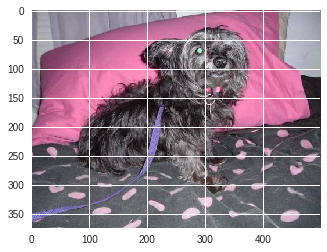

In [0]:
plt.imshow(plt.imread(TRAIN_DOG_DIR / "dog.0.jpg"))

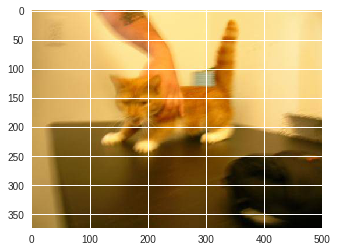

In [0]:
plt.imshow(plt.imread(TRAIN_CAT_DIR / "cat.0.jpg"))

Feel free to convince yourself that the other images are also dogs and cats.

**Question**: Is this dataset balanced or not?

In [0]:
len(list(TRAIN_DOG_DIR.glob("*.jpg")))

1000

In [0]:
# YOUR CODE HERE: check the number of files in TRAIN_CAT_DIR

What do you conclude on the use of the **accuracy** metric for this dataset?

# A simple ConvNet from scratch

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

**Exercise: check the dimensions of the images.**

Use `plt.imread()`, as above, to read on the cat or dog images. This function returns a numpy array. Check the shape of the numpy array.

For example, if `a` is a numpy array, you may call `a.shape` to get the shape.

The shape is in `(y, x, depth)`: the number of pixels in the y-direction (height), the number tof pixels in the x-direction (width) and the number of channels (3 for each primary color). 

In [0]:
# YOUR CODE HERE


plt.imread(TRAIN_CAT_DIR / "cat.0.jpg").shape

(374, 500, 3)

Now assign **half** of these numbers to DIM_Y and DIM_X below.
That's right, we're resizing the image to be half of the original. This speeds things up and still allows us to reach reasonable performance.

In [0]:
# YOUR CODE HERE
# DIM_Y = 
# DIM_X = 


DIM_Y = 374 // 2
DIM_X = 500 // 2

We are now going to build the model.

We will build 3 groups of Convolution + MaxPooling. The first group has already been initialized below:

In [0]:
model = Sequential()
model.add(Conv2D(16, 3, input_shape=(DIM_Y, DIM_X, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2))

For the second group, add a Conv2D with 32 filters, a ReLU activation, and a MaxPooling2D with pool size of 2.

In [0]:
# YOUR CODE HERE


model.add(Conv2D(32, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2))

The third group is the same, except increase the number of convolution filters to 64:

In [0]:
# YOUR CODE HERE


model.add(Conv2D(64, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2))

Now, use `Flatten()` to go back to 1 dimension, and add a fully-connected layer with 512 nodes. Use `Dense(512)` to do that. Finally, use the ReLU activation function again:

In [0]:
# YOUR CODE HERE


model.add(Flatten()) 
model.add(Dense(512)) 
model.add(Activation('relu'))

We end with a Sigmoid node (`Dense(1)` with sigmoid activation function")

In [0]:
# YOUR CODE HERE


model.add(Dense(1))
model.add(Activation('sigmoid'))

In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
batch_size = 16

train_datagen = ImageDataGenerator(rescale=1/255)
train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(DIM_Y, DIM_X),
    batch_size=batch_size,
    class_mode="binary")

val_datagen = ImageDataGenerator(rescale=1/255)
val_generator = val_datagen.flow_from_directory(
    VAL_DIR,
    target_size=(DIM_Y, DIM_X),
    batch_size=batch_size,
    class_mode="binary")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
train_generator.class_indices

{'cats': 0, 'dogs': 1}

In [0]:
model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=10,
        validation_data=val_generator,
        validation_steps=1000 // batch_size
)

Epoch 1/10
125/125 [==============================] - 15s 120ms/step - loss: 0.7215 - acc: 0.5320 - val_loss: 0.6669 - val_acc: 0.5990
Epoch 2/10
125/125 [==============================] - 15s 118ms/step - loss: 0.6373 - acc: 0.6425 - val_loss: 0.6174 - val_acc: 0.6790
Epoch 3/10
125/125 [==============================] - 15s 119ms/step - loss: 0.5310 - acc: 0.7455 - val_loss: 0.5805 - val_acc: 0.7010
Epoch 4/10
125/125 [==============================] - 15s 118ms/step - loss: 0.4151 - acc: 0.8240 - val_loss: 0.5987 - val_acc: 0.7100
Epoch 5/10
125/125 [==============================] - 15s 120ms/step - loss: 0.2755 - acc: 0.8795 - val_loss: 0.7148 - val_acc: 0.7200
Epoch 6/10
125/125 [==============================] - 15s 120ms/step - loss: 0.1643 - acc: 0.9365 - val_loss: 0.8265 - val_acc: 0.7170
Epoch 7/10
125/125 [==============================] - 15s 119ms/step - loss: 0.0806 - acc: 0.9735 - val_loss: 1.0890 - val_acc: 0.7080
Epoch 8/10
125/125 [==============================] - 1

How did this go? Did you manage to get reasonable accuracy?
You might see that it's overfitting pretty heavily. Let's see what we can do.

## Data augmentations

Getting more training data usually helps with the overfitting problem. One way to easily get more training data, is by "augmenting" the existing data. We can create new training images by applying random transformations on the existing images.

In the `ImageDataGenerator` above, that we assigned to `train_datagen`, we can add optional transformations.
For example:

    shear_range=0.1,
    rotation_range=30,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True 
    
Below, we'll define a new `ImageDataGenerator` with augmentations. Select a couple from above, or all, and feel free to change parameters to get more or less extreme augmentations.

In [0]:
train_datagen_aug = ImageDataGenerator(
    rescale=1/255,
    # YOUR CODE HERE: data augmentations
)
train_generator_aug = train_datagen_aug.flow_from_directory(
    TRAIN_DIR,
    target_size=(DIM_Y, DIM_X),
    batch_size=batch_size,
    class_mode="binary")



In [0]:
# TODO DELET ETEHIS
train_datagen_aug = ImageDataGenerator(
    rescale=1/255,
    shear_range=0.1,
    rotation_range=30,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True 
)
train_generator_aug = train_datagen_aug.flow_from_directory(
    TRAIN_DIR,
    target_size=(DIM_Y, DIM_X),
    batch_size=batch_size,
    class_mode="binary")

Found 2000 images belonging to 2 classes.


Let's see some results:

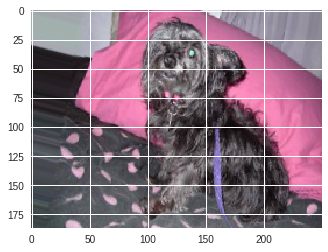

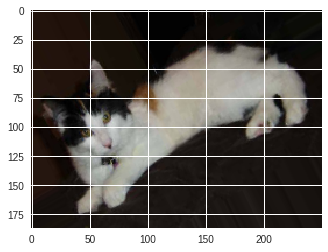

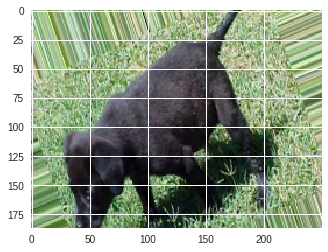

In [0]:
batch = next(train_generator_aug)[0]

for i in range(3):
    plt.imshow(batch[i, :])
    plt.show()

In [0]:
DIM_X 

250

As long as it still looks realistic, it's usually fine! Let's see if this helps:

In [0]:
model_aug = Sequential()
model_aug.add(Conv2D(16, 3, input_shape=(DIM_Y, DIM_X, 3)))
model_aug.add(Activation('relu'))
model_aug.add(MaxPooling2D(pool_size=2))
model_aug.add(Conv2D(32, 3))
model_aug.add(Activation('relu'))
model_aug.add(MaxPooling2D(pool_size=2))
model_aug.add(Conv2D(64, 3))
model_aug.add(Activation('relu'))
model_aug.add(MaxPooling2D(pool_size=2))
model_aug.add(Flatten()) 
model_aug.add(Dense(512)) 
model_aug.add(Activation('relu'))
model_aug.add(Dense(1))
model_aug.add(Activation('sigmoid'))
model_aug.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_aug.fit_generator(
        train_generator_aug,
        steps_per_epoch=2000 // batch_size,
        epochs=10,
        validation_data=val_generator,
        validation_steps=1000 // batch_size
)

Epoch 1/10
125/125 [==============================] - 36s 291ms/step - loss: 0.8631 - acc: 0.5045 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 2/10
125/125 [==============================] - 35s 281ms/step - loss: 0.6922 - acc: 0.5360 - val_loss: 0.6896 - val_acc: 0.5840
Epoch 3/10
125/125 [==============================] - 35s 281ms/step - loss: 0.6935 - acc: 0.5245 - val_loss: 0.6910 - val_acc: 0.5150
Epoch 4/10
125/125 [==============================] - 35s 280ms/step - loss: 0.6890 - acc: 0.5680 - val_loss: 0.6795 - val_acc: 0.5580
Epoch 5/10
125/125 [==============================] - 35s 279ms/step - loss: 0.6731 - acc: 0.5965 - val_loss: 0.6659 - val_acc: 0.6190
Epoch 6/10
125/125 [==============================] - 35s 278ms/step - loss: 0.6699 - acc: 0.6080 - val_loss: 0.6575 - val_acc: 0.6050
Epoch 7/10
125/125 [==============================] - 35s 283ms/step - loss: 0.6497 - acc: 0.6305 - val_loss: 0.6091 - val_acc: 0.6630
Epoch 8/10
125/125 [==============================] - 3

--> Yes, it seems like it does! Training accuracy is down and validation accuracy is up. So there is less overfitting and it generalizes better to unseen data.

Let's output some of the model's predictions:

In [0]:
def process_images(in_images):
    for img in in_images:
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0) / 255
        yield x
        
def show(model_):
    pred_class_label_map = {0: "cats", 1: "dogs"}
    actual_labels = 8 * ["cats"] + 8 * ["dogs"]
    random_img_paths = np.concatenate((np.random.choice(list(VAL_CAT_DIR.glob("*.jpg")), 8),
                                       np.random.choice(list(VAL_DOG_DIR.glob("*.jpg")), 8)))
    random_imgs = [image.load_img(file, target_size=(DIM_Y, DIM_X)) for file in random_img_paths]
    random_imgs_processed = list(process_images(random_imgs))

    # Predict:
    images = np.vstack(random_imgs_processed) 
    pred_classes = model_.predict_classes(images, batch_size=16).ravel()
    
    fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 16))

    for img, ax, actual_label, pred_class in zip(random_imgs_processed, axes.ravel(), actual_labels, pred_classes):
        pred_label = pred_class_label_map[pred_class]
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        result = "ok" if actual_label == pred_label else "NOK"
        ax.set_title("{}, y={}, {}={}".format(result, actual_label, '$\hat{y}$', pred_label))
        ax.imshow(img.squeeze())

    plt.tight_layout()
    plt.show()

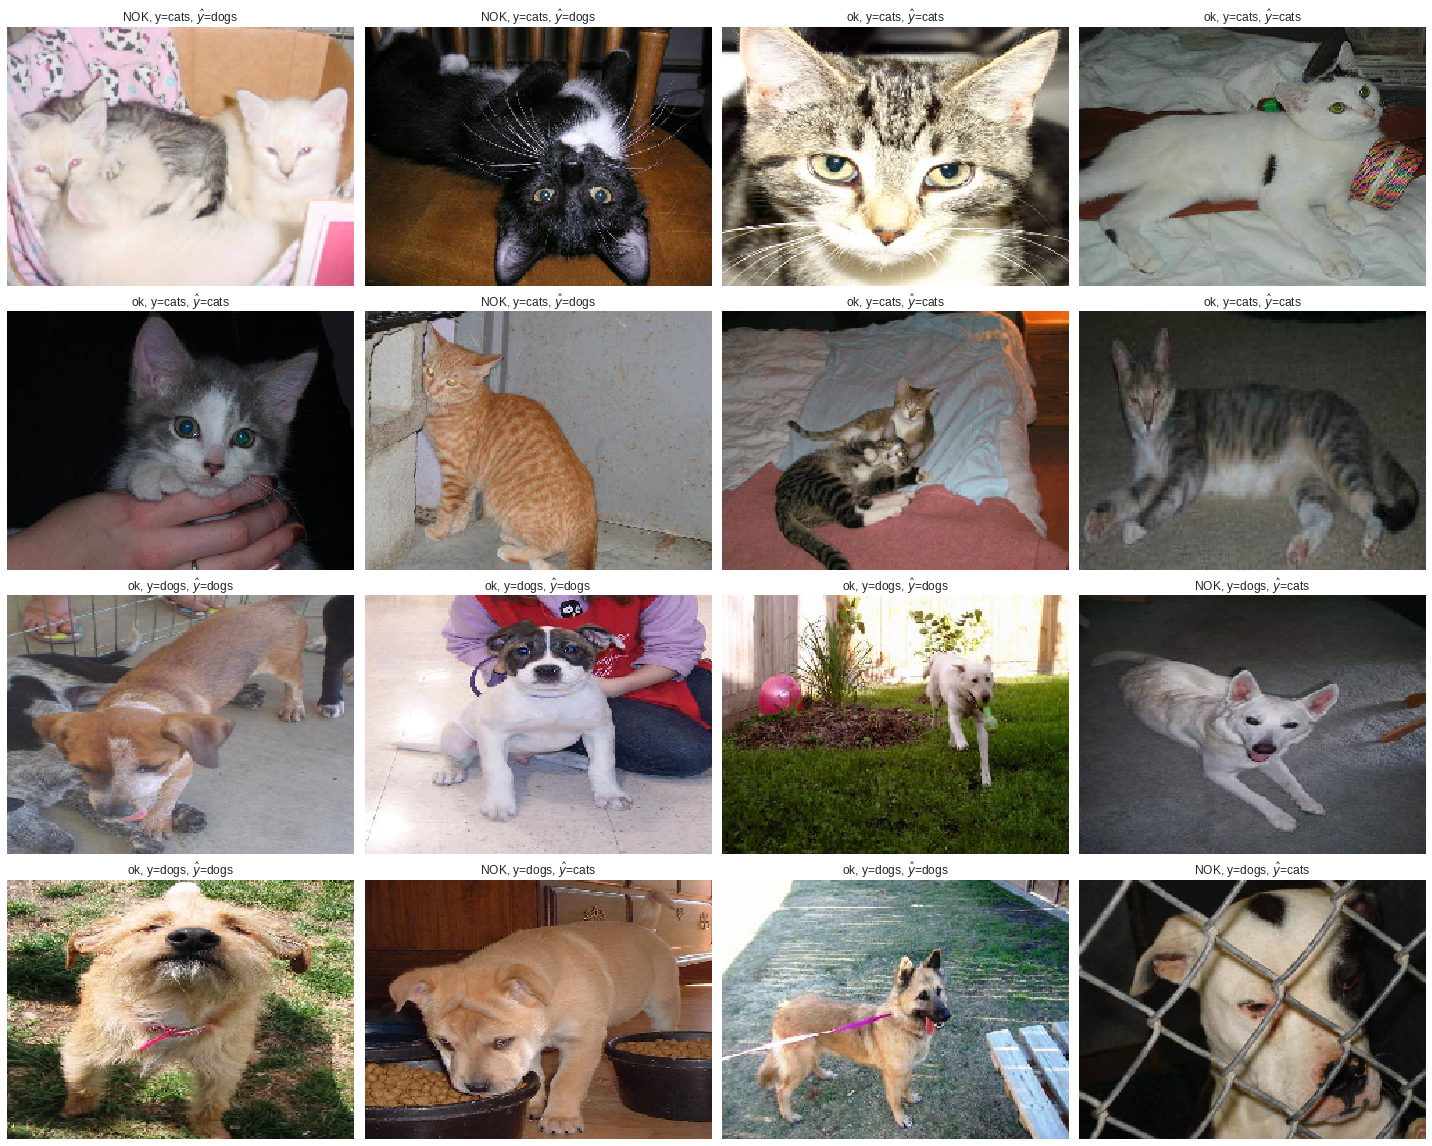

In [0]:
show(model_aug)

# Open-ended bonus assignment
- Try increasing the representation size. Earlier, we only used half of the image. Does it help if we use 100% of the image?
- Overfitting can also be reduced by including a Dropout layer. Dropout randomly zeroes out neurons, which makes the model generalize better. Try putting a `Dropout(0.5)` between the Dense(512) and the Dense(1) layer, after the ReLU activation.
- Try increasing or decreasing the number of convolution filters, adding another block of Conv2D and MaxPooling, taking out a block or increasing or decreasing the number of nodes in the fully connected (Dense) layer. Sometimes it helps to add a second fully connected (Dense) layer. 
    - Note: It is definitely possible to improve on this simple Convolutional Neural Network, but you'll probably find that iterating towards the optimal architecture is quite difficult and time consuming.